# Polynomial Regression Quick start 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression

## Load the data

In [3]:
url = 'https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/Regression/Datasets/EconomiesOfScale.csv'
economy_df = pd.read_csv(url)
economy_df.head(3)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311


## Explore the data

In [5]:
economy_df.describe().iloc[:3, :]

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322


In [6]:
economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.7 KB


## Visualize the data

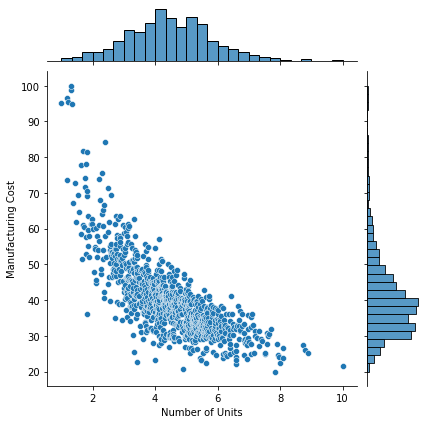

In [7]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data=economy_df);

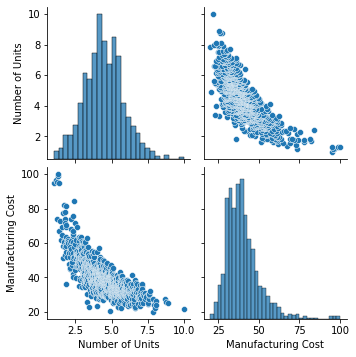

In [9]:
sns.pairplot(data=economy_df);

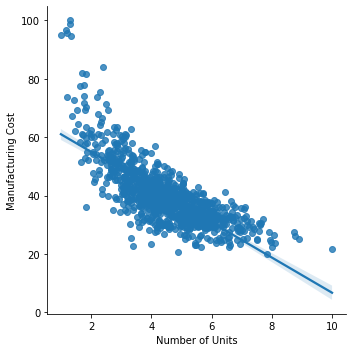

In [8]:
sns.lmplot(x='Number of Units', y='Manufacturing Cost', data=economy_df);

## Features (X) target (y)

In [12]:
## features and targets
X = economy_df.loc[:,['Number of Units']]
y = economy_df['Manufacturing Cost']

print('Shape of Independent variables',X.shape)
print('Shape of dependent variables',y.shape)

## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of Independent variables (1000, 1)
Shape of dependent variables (1000,)
Shape of X_train (800, 1)
Shape of y_train (800,)
Shape of X_test (200, 1)
Shape of y_test (200,)


## Model building

* #### Linear model<br>  **dependent-var = y-intercept + slope*independent-var**

Polynomial regression capture the relation between X & Y as nth degree polynomial in X <br>
**y = b0 + b1*x + b2*x^2 + b3*x^3 + ........... + bn*x^n**
> * #### Linear model degree 2
> * #### Linear model degree 3
> * #### Linear model degree 4

In [13]:
# instantiate the model
linear = LinearRegression()
# train the model
linear.fit(X_train, y_train)

linear_preds = linear.predict(X_test)

print('Model coefficient',linear.coef_)
print('Model y-intercept',linear.intercept_)

Model coefficient [-6.21850698]
Model y-intercept 67.89012908512078


In [14]:
# utility for polynomial feature matrix
def poly_feature_matrix(X, deg):
    poly = PolynomialFeatures(degree=deg)
    return poly.fit_transform(X), poly

# utility for polynomial regression
def poly_reg(X_train, y_train, X_test, degree):
    poly_X, poly = poly_feature_matrix(X_train, degree)
    # instantiate the model
    model = LinearRegression()
    # train the model
    model.fit(poly_X, y_train)
    # transform test data
    poly_test = poly.transform(X_test)
    poly_preds = model.predict(poly_test)
    
    print('Model coefficient',model.coef_)
    print('Model y-intercept',model.intercept_)
    
    return poly_preds, model.coef_, model.intercept_


Polynomial Regression Degree 2

In [15]:
deg2_preds, deg2_coef, deg2_intercept = poly_reg(X_train, y_train, X_test, 2)

Model coefficient [  0.         -17.81636965   1.27181952]
Model y-intercept 92.0358203494911


Polynomial Regression Degree 3

In [16]:
deg3_preds, deg3_coef, deg3_intercept = poly_reg(X_train, y_train, X_test, 3)

Model coefficient [  0.         -34.51814321   5.05171512  -0.26070502]
Model y-intercept 114.03870684172253


Polynomial Regression Degree 4

In [17]:
deg4_preds, deg4_coef, deg4_intercept = poly_reg(X_train, y_train, X_test, 4)

Model coefficient [ 0.00000000e+00 -5.48053513e+01  1.21644641e+01 -1.26644861e+00
  4.90848244e-02]
Model y-intercept 133.24714610652126


## Visualize model predictions

In [19]:
def plot_predictions(X, y, preds, title='Linear model'):
    plt.scatter(X,y)
    plt.scatter(X, preds, color='red', s=5)
    plt.title(title)

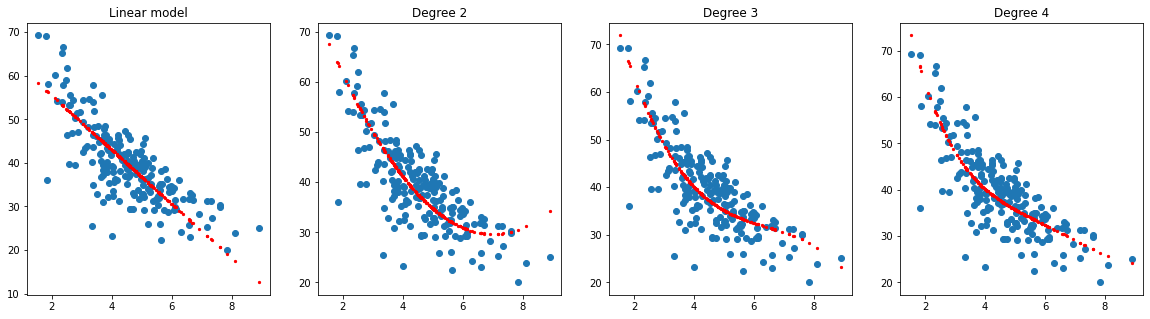

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plot_predictions(X_test, y_test, linear_preds)
plt.subplot(1,4,2)
plot_predictions(X_test, y_test, deg2_preds, title='Degree 2')
plt.subplot(1,4,3)
plot_predictions(X_test, y_test, deg3_preds, title='Degree 3')
plt.subplot(1,4,4)
plot_predictions(X_test, y_test, deg4_preds, title='Degree 4')